Main idea is to understand that calibration curve does not aim to impact accuracy measures.

It transforms predicted probabilities into 'realistic/real' probabilities of events.

We can analyze the calibration curve to understand the behavior of the model throughout the bins and it's own interpretability rather than score/accuracy measure.

Also, we can use CalibratedClassifierCV to calibrate a model using specific methods: sigmoid and isotonic

# Breast cancer Data

In [89]:
#Data
from sklearn.datasets import load_breast_cancer

#Sklearn
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.calibration import calibration_curve,CalibratedClassifierCV
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report,accuracy_score, log_loss
from sklearn.preprocessing import StandardScaler

#Default
import numpy as np
import matplotlib.pyplot as plt

Dataset

In [90]:
# Loading dataset
dataset = load_breast_cancer()
X = dataset.data
y = dataset.target

In [91]:
X

array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
        1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
        8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
        8.758e-02],
       ...,
       [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
        7.820e-02],
       [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
        1.240e-01],
       [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
        7.039e-02]])

In [92]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [93]:
sc = StandardScaler()
X_sc = sc.fit_transform(X)

# Split data 

In [94]:
# Split the data into training and testing sets, and calibration 
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=23)

X_train2, X_calib, y_train2, y_calib = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=23)

Logistic Regression

In [95]:
# Train a logistic regression classifier
lr = LogisticRegression(max_iter=1000, random_state=23)
lr.fit(X_train2, y_train2)
 

c:\Users\User\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=1000, random_state=23)

In [96]:
#Logistic Regression Score 
lr.score(X_test,y_test)


0.9649122807017544

In [97]:
lr_ypred = lr.predict(X_test)

print(lr_ypred[0])  #Class 1 
print(lr.predict_proba([X_test[0]])) #Array of probabilities of respective classes 0,1  

prob_pos = lr.predict_proba(X_test)[:,1]

1
[[0.01034971 0.98965029]]


In [98]:
# True and Predicted Probabilities
true_pos, pred_pos = calibration_curve(y_test, prob_pos, n_bins=10)

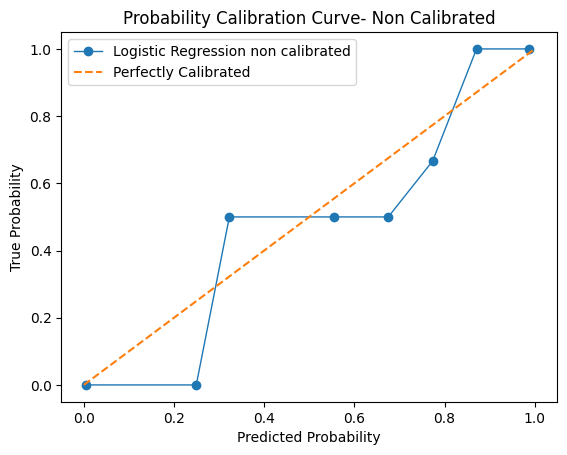

In [99]:
#Plot the Probabilities Calibrated curve
plt.plot(pred_pos,
         true_pos, 
         marker='o', 
         linewidth=1, 
         label='Logistic Regression non calibrated')
 
#Plot the Perfectly Calibrated by Adding the 45-degree line to the plot
plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         label='Perfectly Calibrated')
 
 
# Set the title and axis labels for the plot
plt.title('Probability Calibration Curve- Non Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
 
# Add a legend to the plot
plt.legend(loc='best')
 
# Show the plot
plt.show()

## Calibrating Naive Bayes Gaussian with isotonic method, and analyzing it's curve

Calibrating Naive Bayes using isotonic method

In [100]:
gnb = GaussianNB()
gnb_isotonic = CalibratedClassifierCV(gnb, cv=2, method="isotonic")

gnb_isotonic.fit(X_calib,y_calib)

CalibratedClassifierCV(cv=2, estimator=GaussianNB(), method='isotonic')

In [101]:

#Predict_proba
pred_proba_nb = gnb_isotonic.predict_proba(X_test)[:,1]

prob_true, prob_pred = calibration_curve(y_test, pred_proba_nb, n_bins=10, pos_label=1)

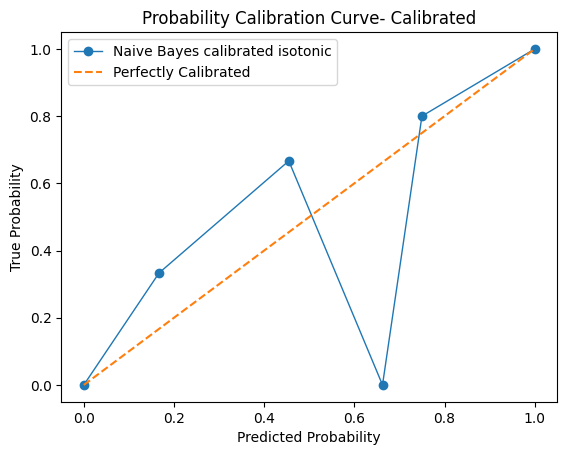

In [102]:
#Plot the Probabilities Calibrated curve
plt.plot(prob_pred,
         prob_true, 
         marker='o', 
         linewidth=1, 
         label='Naive Bayes calibrated isotonic')
 
#Plot the Perfectly Calibrated by Adding the 45-degree line to the plot
plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         label='Perfectly Calibrated')
 
 
# Set the title and axis labels for the plot
plt.title('Probability Calibration Curve- Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
 
# Add a legend to the plot
plt.legend(loc='best')
 
# Show the plot
plt.show()

# Using Linear SVC

In [116]:
svc=SVC()
svc.fit(X_train,y_train)

svc_isotonic = CalibratedClassifierCV(svc, cv=2, method="isotonic")

svc_isotonic.fit(X_calib,y_calib)

CalibratedClassifierCV(cv=2, estimator=SVC(), method='isotonic')

In [117]:

#Predict_proba
pred_proba_svc = svc_isotonic.predict_proba(X_test)[:,1]

probb_true, probb_pred = calibration_curve(y_test, pred_proba_svc, n_bins=10, pos_label=1)

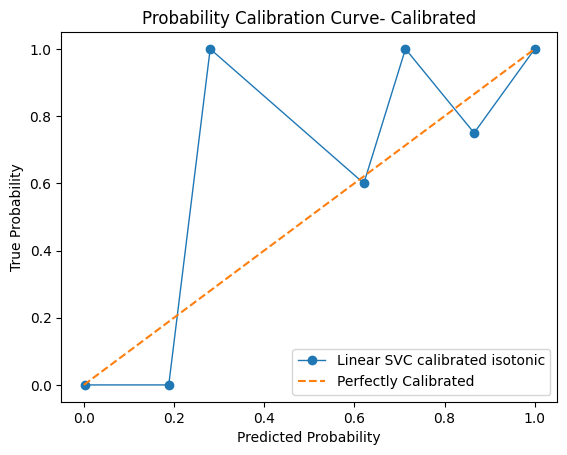

In [118]:
#Plot the Probabilities Calibrated curve
plt.plot(probb_pred,
         probb_true, 
         marker='o', 
         linewidth=1, 
         label='Linear SVC calibrated isotonic')
 
#Plot the Perfectly Calibrated by Adding the 45-degree line to the plot
plt.plot([0, 1], 
         [0, 1], 
         linestyle='--', 
         label='Perfectly Calibrated')
 
 
# Set the title and axis labels for the plot
plt.title('Probability Calibration Curve- Calibrated')
plt.xlabel('Predicted Probability')
plt.ylabel('True Probability')
 
# Add a legend to the plot
plt.legend(loc='best')
 
# Show the plot
plt.show()

#Comparing log loss

In [119]:
print("Logistic Regression log loss score: ",log_loss(y_test,prob_pos))
print("Naive Bayes- Isotonic log loss score: ",log_loss(y_test,pred_proba_nb))
print("SVC- Isotonic log loss score: ",log_loss(y_test,pred_proba_svc))

#

Logistic Regression log loss score:  0.07256652836911545
Naive Bayes- Isotonic log loss score:  0.07811078464341543
SVC- Isotonic log loss score:  0.10561016291821207
